In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# 1. histogram of the number of gene sets per lib_name

In [2]:
geneset_sz = readr::read_tsv("geneset_sz.tsv")

Rows: 9967 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): lib_name, descr
dbl (1): num_genes

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
head(geneset_sz)

lib_name,descr,num_genes
<chr>,<chr>,<dbl>
KEGG_2021_Human,ABC transporters,45
KEGG_2021_Human,AGE-RAGE signaling pathway in diabetic complications,100
KEGG_2021_Human,AMPK signaling pathway,120
KEGG_2021_Human,Acute myeloid leukemia,67
KEGG_2021_Human,Adherens junction,71
KEGG_2021_Human,Adipocytokine signaling pathway,69


In [84]:
unique(geneset_sz$lib_name)

[1] "KEGG_2021_Human"            "Reactome_2022"             
[3] "WikiPathway_2023_Human"     "GO_Biological_Process_2023"
[5] "GO_Molecular_Function_2023" "GO_Cellular_Component_2023"

In [85]:
# Count the number of gene sets per lib_name
gene_set_counts <- geneset_sz %>%
  group_by(lib_name) %>%
  summarise(num_gene_sets = n()) 

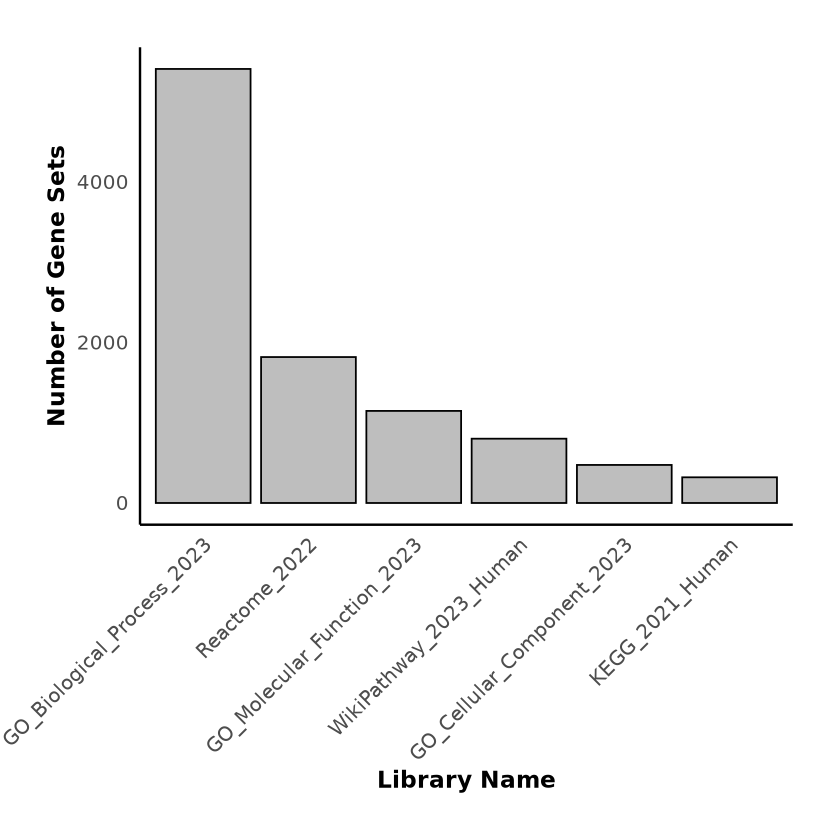

In [96]:
# Create the plot
p <- ggplot(gene_set_counts, aes(x = reorder(lib_name, -num_gene_sets), y = num_gene_sets)) +
  geom_bar(stat = "identity", fill = "grey", color = "black") +
  xlab("Library Name") +
  ylab("Number of Gene Sets") +
  theme_minimal(base_size = 15) + # Minimal theme with a base font size
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(color = "black"), 
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    plot.margin = margin(1, 1, 1, 1, "cm"), # Top, right, bottom, left margins

  ) 
p

In [47]:
ggsave("figures/1_number_of_gene_sets_per_lib.pdf", plot = p, device = "pdf",width = 8, height = 8, dpi = 300)

# 2. histogram of the number of genes in each gene set for each library

In [79]:
# Create the histogram for the number of genes in each gene set for each library
p <- ggplot(geneset_sz, aes(x = num_genes, fill = lib_name)) +
  geom_histogram(bins = 50, color = "black", alpha = 0.7, position = "identity") +
  facet_wrap(~ lib_name, scales = "free") +
  xlab("Number of Genes in Gene Set") +
  ylab("Frequency") +
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    legend.position = "none",
    strip.text = element_text(face = "bold", size = 12),
    plot.margin = margin(1, 1, 1, 1, "cm") # Top, right, bottom, left margins
  )


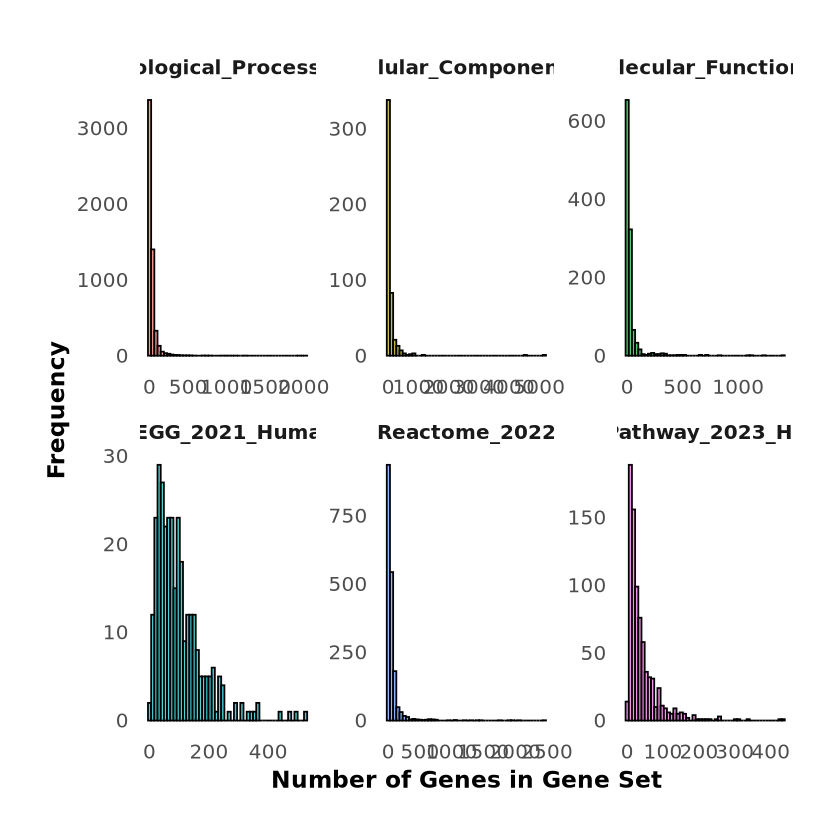

In [80]:
p

In [81]:
ggsave("figures/2_number_of_genes_per_lib.pdf", plot = p, device = "pdf", width = 15, height = 8, dpi = 300)